In [2]:

import tensorflow.keras as keras
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from keras.wrappers.scikit_learn import KerasClassifier



In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

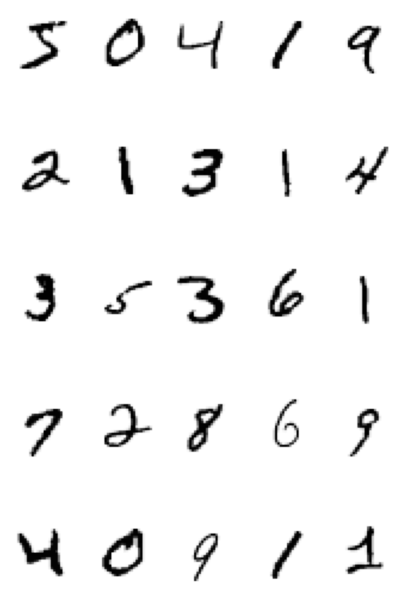

In [4]:
plt.figure(figsize=(5,8))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

In [5]:

#reshape the data into 4 dimensions
X_train_reshaped = X_train.reshape((60000, 28, 28, 1))
X_test_reshaped = X_test.reshape((10000, 28, 28, 1))

# scale the output to range 0,1
X_train_reshaped = X_train_reshaped.astype('float32') / 255
X_test_reshaped = X_test_reshaped.astype('float32') / 255

num_classes = 10
y_train_reshaped = keras.utils.to_categorical(y_train,num_classes)
y_test_reshaped = keras.utils.to_categorical(y_test, num_classes)

In [11]:
y_train.shape

(60000,)

Define the model
1. Provide input image into convolution layer
2. Choose parameters, apply filters with strides, padding if requires. 
Perform convolution on the image and apply ReLU activation to the matrix.
3. Perform pooling to reduce dimensionality size
4. Add as many convolutional layers until satisfied
5. Flatten the output and feed into a fully connected layer (FC Layer)
6. Output the class using an activation function (Logistic Regression with cost functions) and classifies images.


Now we can build the model
We can define number of kernels
The number of strides
The activation function to be used

In [9]:
K.clear_session()

In [10]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=32,
                            padding='same',
                            activation ='tanh',
                            kernel_size=(3,3),
                            input_shape=(28, 28, 1) # rows, cols, color channels
                            ))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters=64,
                            padding='same',
                            kernel_size=(3,3),
                            use_bias=False,
                            input_shape=(28, 28, 1) 
                            ))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("tanh"))
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Conv2D(filters=128,
                            padding='same',
                            activation ='relu',
                            kernel_size=(3,3),
                            input_shape=(28, 28, 1)
                            ))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model

In [12]:
model.output_shape

(None, 10)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18432     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 7, 7, 64)         256       
 ormalization)                                                   
                                                        

In [16]:
from tensorflow.keras.utils import plot_model

plot_model(model,
   show_shapes=False,
   show_layer_names=True,
   rankdir='TB', expand_nested=False, dpi=96
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
#compile model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
##train the model
input_dim = X_train_reshaped.shape[1]
batch_size = input_dim

In [23]:
results = model.fit(X_train_reshaped, y_train_reshaped, epochs=10, batch_size=150, validation_split=0.3)

Epoch 1/10
280/280 [==============================] - 78s 254ms/step - loss: 0.2240 - accuracy: 0.9308 - val_loss: 0.2562 - val_accuracy: 0.9679
Epoch 2/10
280/280 [==============================] - 81s 289ms/step - loss: 0.0554 - accuracy: 0.9821 - val_loss: 0.0771 - val_accuracy: 0.9776
Epoch 3/10
280/280 [==============================] - 94s 338ms/step - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0646 - val_accuracy: 0.9811
Epoch 4/10
280/280 [==============================] - 71s 254ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0435 - val_accuracy: 0.9880
Epoch 5/10
280/280 [==============================] - 70s 249ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.1568 - val_accuracy: 0.9646
Epoch 6/10
280/280 [==============================] - 63s 227ms/step - loss: 0.0151 - accuracy: 0.9950 - val_loss: 0.0708 - val_accuracy: 0.9844
Epoch 7/10
280/280 [==============================] - 70s 250ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0464 - val_ac

In [ ]:
##Calculate the accuracy.

In [24]:
results.history['val_accuracy']

[0.9678888916969299,
 0.9776111245155334,
 0.9811111092567444,
 0.9879999756813049,
 0.964555561542511,
 0.9843888878822327,
 0.9893333315849304,
 0.9888888597488403,
 0.9879444241523743,
 0.9869444370269775]

In [25]:
results.history['accuracy']

[0.9308333396911621,
 0.9820952415466309,
 0.9881904721260071,
 0.991261899471283,
 0.9936904907226562,
 0.994952380657196,
 0.9954761862754822,
 0.9964285492897034,
 0.9969285726547241,
 0.9971904754638672]

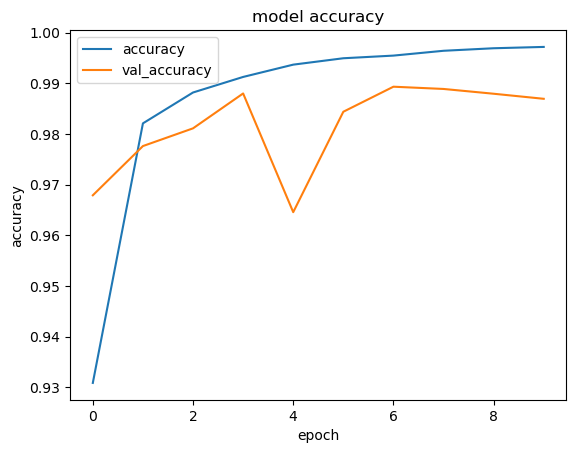

In [26]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()

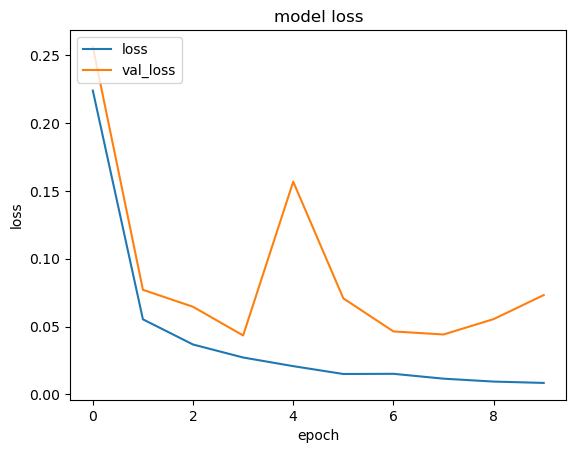

In [27]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [28]:
#Evaluate model
train_scores, train_histories = model.evaluate(X_train_reshaped, y_train_reshaped)
test_scores, test_histories = model.evaluate(X_test_reshaped, y_test_reshaped)
train_scores, train_histories
test_scores, test_histories

313/313 [==============================] - 6s 19ms/step - loss: 0.0453 - accuracy: 0.9894


(0.04526650160551071, 0.9894000291824341)

In [29]:
y_pred = np.argmax(model.predict(X_test_reshaped), axis=-1)

313/313 [==============================] - 8s 14ms/step


In [32]:
y_test_reshaped =np.argmax(y_test_reshaped,axis = 1)

AxisError: axis 1 is out of bounds for array of dimension 1

In [33]:
y_pred[2], y_test_reshaped[2]

(1, 1)

In [35]:
##save the model
model.save('mnist_final_model.h5')

In [ ]:
###predictions

In [36]:
model.predict(X_test_reshaped)[:10]

313/313 [==============================] - 3s 11ms/step


array([[1.66993867e-11, 9.99928981e-13, 3.35639638e-13, 1.20091762e-12,
        4.50466911e-17, 2.65150305e-18, 1.75430048e-20, 1.00000000e+00,
        1.05910332e-15, 1.31105321e-10],
       [5.96141517e-13, 2.52585343e-14, 1.00000000e+00, 1.04453545e-21,
        7.20705040e-22, 1.22404297e-31, 3.37772426e-13, 9.35166154e-22,
        1.89586000e-20, 2.50272283e-19],
       [2.35306848e-12, 1.00000000e+00, 5.04599184e-13, 2.70366506e-18,
        1.60828798e-11, 1.42236049e-15, 1.12686215e-10, 9.64380688e-14,
        1.85940673e-13, 5.90765772e-14],
       [1.00000000e+00, 3.33920147e-20, 2.02314010e-15, 6.36754071e-19,
        3.08394075e-17, 2.20235528e-16, 1.66625852e-10, 2.91188699e-16,
        6.17734140e-16, 9.92694018e-14],
       [6.18175781e-21, 5.22312826e-20, 2.58021689e-20, 2.05704771e-22,
        1.00000000e+00, 1.79880008e-23, 4.79986208e-17, 4.96239253e-20,
        1.04932948e-18, 2.35704398e-08],
       [1.16051496e-13, 1.00000000e+00, 3.46983388e-14, 4.88830784e-21,
   

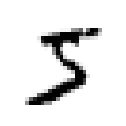

In [38]:
plt.figure(figsize=(8,8))
for i in range(1):
    plt.subplot(3, 5, 1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')
    number = i

In [ ]:
##does model predicts correct.

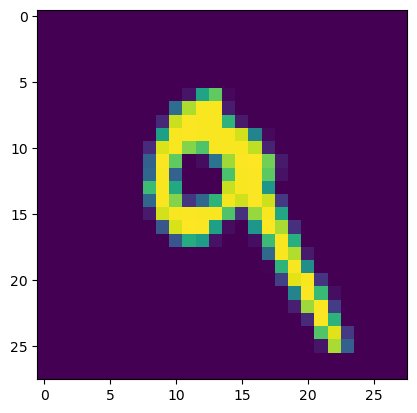

In [39]:
a_number = X_test_reshaped[7]

a_number.reshape(1,28,28,1)
plt.imshow(a_number)

In [42]:
X_test_reshaped[3]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        